In [1]:
import math

nums = [1, 2, 5, 1, 3, 100, 3, 5, 40, 45, 279, 130, 71]

# Solusi No 1

In [3]:
#Urutkan list nums sesuai urutan dari yang terkecil hingga terbesar
nums.sort()
nums

[1, 1, 2, 3, 3, 5, 5, 40, 45, 71, 100, 130, 279]

In [9]:
def first_quartile(n):
    # Nomor 1a
    Q1_pos = 0.25 * (len(n) + 1)
    if Q1_pos.is_integer():
        return n[int(Q1_pos) - 1]
    else:
        lower = n[int(Q1_pos) - 1]
        upper = n[int(Q1_pos)]
        return lower + (upper - lower) * (Q1_pos - int(Q1_pos))

def median(n):
    # Nomor 1b
    mid = len(n) // 2
    # Check if the number of data points is odd
    if len(n) % 2:
        return n[mid]
    else:
        # If even, return the average of the two middle numbers
        return (n[mid - 1] + n[mid]) / 2

def third_quartile(n):
    # Nomor 1c
    # Calculate the position of the third quartile
    Q3_pos = 0.75 * (len(n) + 1)
    if Q3_pos.is_integer():
        return n[int(Q3_pos) - 1]
    else:
        lower = n[int(Q3_pos) - 1]
        upper = n[int(Q3_pos)]
        return lower + (upper - lower) * (Q3_pos - int(Q3_pos))

def iqr(n):
    # Nomor 1d
    return third_quartile(n) - first_quartile(n)

In [10]:
print(first_quartile(nums))
print(median(nums))
print(third_quartile(nums))
print(iqr(nums))

# Nomor 1e
Q1 = first_quartile(nums)
Q3 = third_quartile(nums)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in nums if x < lower_bound or x > upper_bound]
outliers

2.5
5
85.5
83.0


[279]

# Solusi No 2

In [19]:
!pip install openpyxl scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [20]:
import pandas as pd
import numpy as np

#Sesuaikan dengan path Anda untuk memuat file marketing_campaign.xlsx
df = pd.read_excel('marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,88,546,8,4,7,0,0,0,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,1,6,1,2,5,0,0,0,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,49,127,8,10,4,0,0,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,4,20,2,4,6,0,0,0,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,43,118,5,6,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,2013-06-13,46,43,182,9,4,5,0,0,0,0
2236,4001,1946,PhD,Together,64014,2,1,2014-06-10,56,0,30,8,5,7,0,0,0,0
2237,7270,1981,Graduation,Divorced,56981,0,0,2014-01-25,91,48,217,2,13,6,0,1,0,0
2238,8235,1956,Master,Together,69245,0,1,2014-01-24,8,30,214,6,10,3,0,0,0,0


In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_for_outlier = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntFruits', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']]

#Gunakan PCA untuk mereduksi dimensi dari dataframe df_for_outlier menjadi 2 dimensi, tampilkan juga dataframe setelah jadi 2 dimensi

scaler = StandardScaler()
df_for_outlier_scaled = scaler.fit_transform(df_for_outlier)

pca = PCA(n_components=2)

df_reduced = pca.fit_transform(df_for_outlier_scaled)

df_pca = pd.DataFrame(data=df_reduced, columns=['Principal Component 1', 'Principal Component 2'])
df_pca.columns = ['x', 'y']

df_pca.head()  

,x,y
0,1.952275,1.028649
1,-1.702221,-1.019359
2,1.856237,-0.140249
3,-1.958022,1.285056
4,-0.207091,0.807287


In [57]:
from sklearn.neighbors import LocalOutlierFactor

# Terapkan LOF dengan hyperparameter n_neighbors = 1500. Tentukan ID pelanggan mana saja yang outlier

n_neighbors = 1500

lof = LocalOutlierFactor(n_neighbors=n_neighbors)

lof_outliers = lof.fit_predict(df_pca)
outlier_indices = np.where(lof_outliers == -1)[0]
outlier_ids = df.iloc[outlier_indices]['ID'] if 'ID' in df.columns else "ID column not found in original df"

pd.DataFrame({'LOF_Outlier_IDs': outlier_ids})

,LOF_Outlier_IDs
1066,3005
1288,9010
1492,1763
1572,5350
1612,9242
2233,9432


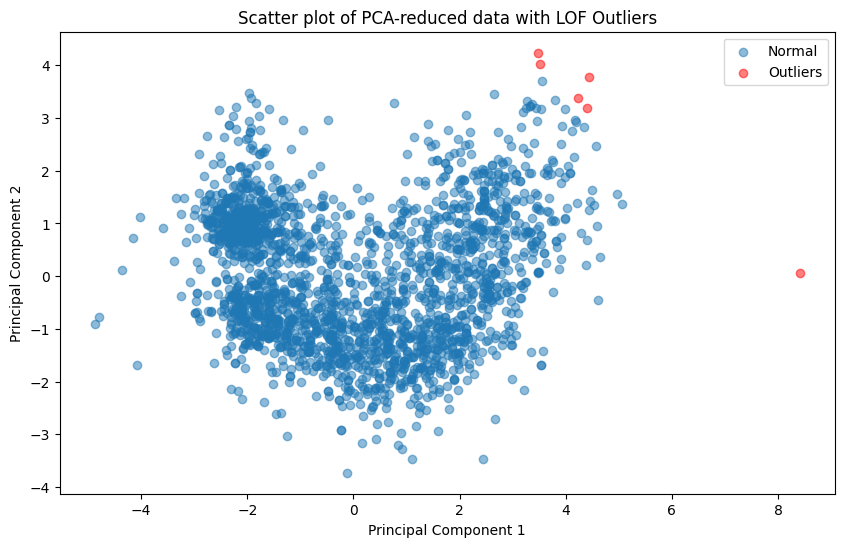

In [58]:
import matplotlib.pyplot as plt

# Buatlah scatter plot yang memvisualisasikan data normal dan outlier (bedakan warna)

plt.figure(figsize=(10, 6))

plt.scatter(df_pca.loc[outliers == 1, 'x'], df_pca.loc[outliers == 1, 'y'], label='Normal', alpha=0.5)
plt.scatter(df_pca.loc[outliers == -1, 'x'], df_pca.loc[outliers == -1, 'y'], color='r', label='Outliers', alpha=0.5)

plt.title('Scatter plot of PCA-reduced data with LOF Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()

# Solusi No 3

In [52]:
from sklearn.cluster import DBSCAN

# Terapkan DBSCAN dengan hyperparameter epsilon = 1500 dan minimum sample = 10. Tentukan ID pelanggan mana saja yang outlier

epsilon = 1500
minimum_samples = 10

dbscan = DBSCAN(eps=epsilon, min_samples=minimum_samples)

dbscan_clusters = dbscan.fit_predict(df_pca)
outlier_indices_dbscan = np.where(dbscan_clusters == -1)[0]
outlier_ids_dbscan = df.iloc[outlier_indices_dbscan]['ID'] if 'ID' in df.columns else "ID column not found in original df"

pd.DataFrame({'DBSCAN_Outlier_IDs': outlier_ids_dbscan})

,DBSCAN_Outlier_IDs


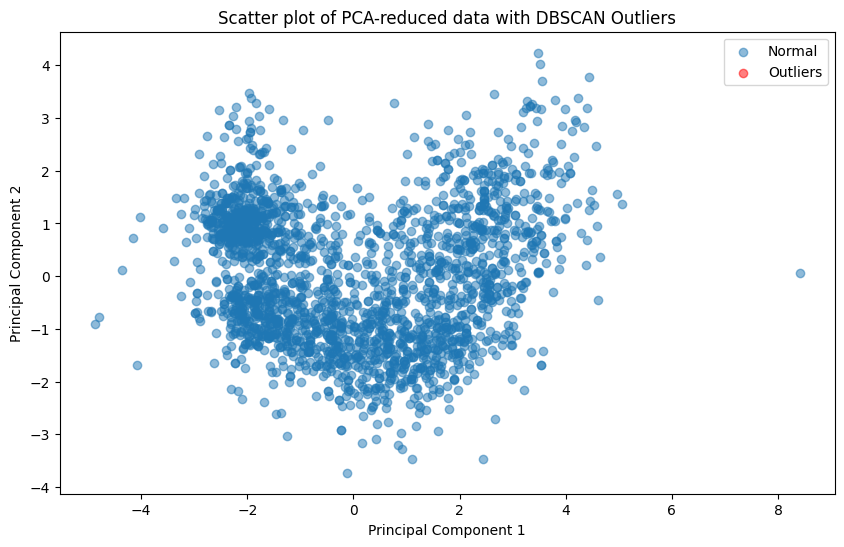

In [53]:
# Buatlah scatter plot yang memvisualisasikan data normal dan outlier (bedakan warna)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(df_pca.loc[dbscan_clusters != -1, 'x'], df_pca.loc[dbscan_clusters != -1, 'y'], label='Normal', alpha=0.5)
plt.scatter(df_pca.loc[dbscan_clusters == -1, 'x'], df_pca.loc[dbscan_clusters == -1, 'y'], color='r', label='Outliers', alpha=0.5)

plt.title('Scatter plot of PCA-reduced data with DBSCAN Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()

# Solusi No 4

In [54]:
from sklearn.ensemble import IsolationForest

# Terapkan Isolation Forest dengan hyperparameter n_estimators = 100, contamination = 0.0024, max_samples = 'auto'. Tentukan ID pelanggan mana saja yang outlier

n_estimators = 100
contamination = 0.0024
maximum_samples = 'auto'

isolation_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination, max_samples=maximum_samples)

if_outliers = isolation_forest.fit_predict(df_pca)
outlier_indices_if = np.where(if_outliers == -1)[0]
outlier_ids_if = df.iloc[outlier_indices_if]['ID'] if 'ID' in df.columns else "ID column not found in original df"


pd.DataFrame({'IsolationForest_Outlier_IDs': outlier_ids_if})

,IsolationForest_Outlier_IDs
1066,3005
1288,9010
1492,1763
1572,5350
1612,9242
1710,477


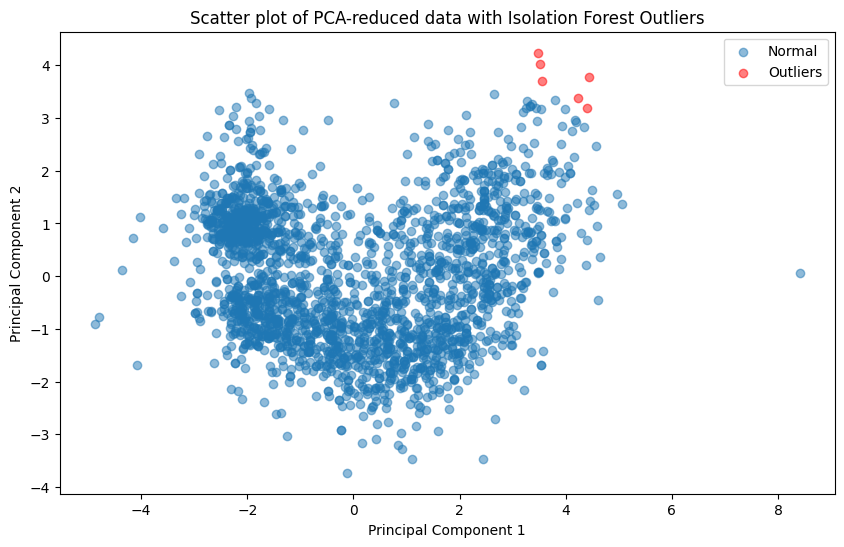

In [56]:
# Buatlah scatter plot yang memvisualisasikan data normal dan outlier (bedakan warna)
plt.figure(figsize=(10, 6))


plt.scatter(df_pca.loc[if_outliers == 1, 'x'], df_pca.loc[if_outliers == 1, 'y'], label='Normal', alpha=0.5)
plt.scatter(df_pca.loc[if_outliers == -1, 'x'], df_pca.loc[if_outliers == -1, 'y'], color='r', label='Outliers', alpha=0.5)

plt.title('Scatter plot of PCA-reduced data with Isolation Forest Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()

# Solusi No 5

In [59]:
lof_outliers_boolean = outliers == -1
dbscan_outliers_boolean = dbscan_clusters == -1
if_outliers_boolean = if_outliers == -1

combined_outlier_indices = np.where(lof_outliers_boolean & dbscan_outliers_boolean & if_outliers_boolean)[0]
combined_outlier_ids = df.iloc[combined_outlier_indices]['ID'] if 'ID' in df.columns else "ID column not found in original df"

pd.DataFrame({'Combined_Outlier_IDs': combined_outlier_ids})

,Combined_Outlier_IDs
